In [1]:
import torch, torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.utils
from alexnet import AlexNet
import torch.nn as nn
from torch.optim import Adam


In [2]:
W = 227 # minimum width for input to pass through alexnet
transform = transforms.Compose([
    transforms.Resize((W, W)), # the original mnist image size is 28*28, alexnet input size is 227*227
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

train = MNIST(root='./data', train=True, download=True, transform=transform)
test = MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size, shuffle=False)

model = AlexNet(10, 1)

/home/anyxling/lxl/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [4]:
learning_rate = 0.01
num_epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

In [5]:
train_losses = []
test_losses = []
test_gen = enumerate(test_loader)

model = model.to(device)
for epoch in range(num_epochs):
    for idx, (train_imgs, train_labels) in enumerate(train_loader):
        train_imgs = train_imgs.to(device)
        train_labels = train_labels.to(device)

        # forward pass
        train_outputs = model(train_imgs)
        # print(labels.shape, outputs.shape, images.shape)
        train_loss = criterion(train_outputs, train_labels)
        train_losses.append(train_loss.item())
        # backward and optimize 
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # get test loss
        try:
            _, (test_imgs, test_labels) = next(test_gen)
        except StopIteration:
            test_gen = enumerate(test_loader) 
            _, (test_imgs, test_labels) = next(test_gen)

        test_imgs = test_imgs.to(device)
        test_labels = test_labels.to(device)
        
        test_outputs = model(test_imgs)
        test_loss = criterion(test_outputs, test_labels)
        test_losses.append(test_loss.item())

    print(f"epoch: {epoch} train_loss: {train_loss} test_loss: {test_loss}")



epoch: 0 train_loss: 3.3645641803741455 test_loss: 4.770510196685791
epoch: 1 train_loss: 3.9921975135803223 test_loss: 3.426241397857666
epoch: 2 train_loss: 10.581636428833008 test_loss: 8.775585174560547
epoch: 3 train_loss: 4.648289680480957 test_loss: 8.019824981689453
epoch: 4 train_loss: 2.276257038116455 test_loss: 2.1105992794036865
epoch: 5 train_loss: 1.860971212387085 test_loss: 1.9561965465545654
epoch: 6 train_loss: 1.512784719467163 test_loss: 1.3941758871078491
epoch: 7 train_loss: 2.4289839267730713 test_loss: 2.1694300174713135
epoch: 8 train_loss: 1.5638619661331177 test_loss: 1.020110845565796
epoch: 9 train_loss: 1.0894169807434082 test_loss: 1.2416300773620605


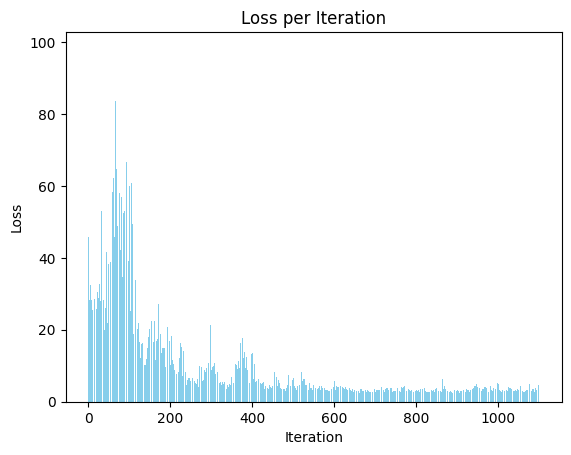

In [11]:
import matplotlib.pyplot as plt
# plt.bar(range(len(train_losses)), train_losses, color='skyblue')

plt.bar(range(len(train_losses[400:1500])), train_losses[400:1500], color='skyblue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.show()